In [102]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix , classification_report, accuracy_score, precision_score, recall_score, f1_score,cohen_kappa_score,
roc_auc_score,roc_curve)
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

## Load Dataset 

In [2]:
past_data = pd.read_csv(r'C:\Users\This pc\Downloads\Day 5 - Inclass - Case Study\Day 5\INNHotelsGroup_pastdata.csv')
past_data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No


In [3]:
new_data = pd.read_csv(r'C:\Users\This pc\Downloads\Day 5 - Inclass - Case Study\Day 5\INNHotelsGroup_newdata.csv')
new_data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1,Not Canceled
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2,Not Canceled
2,INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2,Not Canceled
3,INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1,Not Canceled
4,INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2,Not Canceled


#### Check Duplicates IN DATA

In [4]:
past_data.duplicated(subset=['booking_id']).sum()

0

## create booking ID as index 

In [5]:
past_data.set_index('booking_id',inplace=True)
new_data.set_index('booking_id', inplace=True)

In [6]:
past_data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
booking_id,,,,,,,,,,,
INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No


In [7]:
new_data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1,Not Canceled
INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2,Not Canceled
INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2,Not Canceled
INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1,Not Canceled
INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2,Not Canceled


In [8]:
# Let's explore 'How many cancelled bookings were rebooked?'----->

# How many bookings were cancelled---> depict using pie/bar charts
past_data['booking_status'].value_counts()

booking_status
Not Canceled    18236
Canceled         8857
Name: count, dtype: int64

In [9]:
print(f'Past Data: Rows{past_data.shape[0]} , Columns{past_data.shape[1]}')
print(f'New Data: Rows{new_data.shape[0]} , Columns{new_data.shape[1]}')

Past Data: Rows27093 , Columns11
New Data: Rows3583 , Columns10


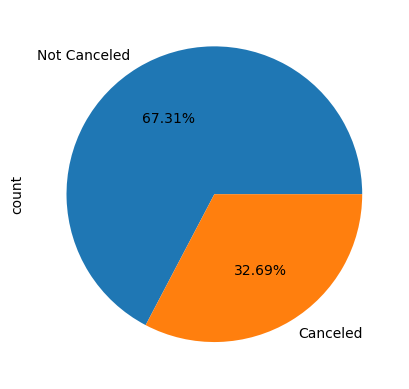

In [10]:
past_data['booking_status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

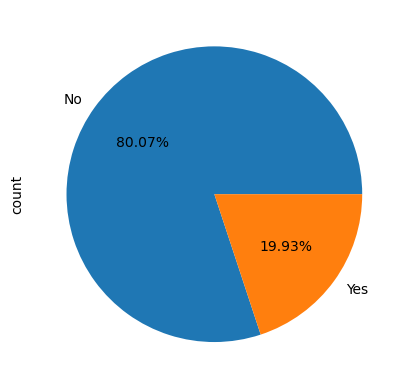

In [11]:
past_data[past_data['booking_status']== 'Canceled']['rebooked'].value_counts()\
.plot(kind='pie',autopct='%.2f%%')
plt.show()

In [12]:
# We can now drop the 'rebooked' col as it's not required in predictive modelling 
past_data.drop(columns=['rebooked'], inplace=True)

In [13]:
past_data. shape

(27093, 10)

# Inferential Statstics

In [14]:
# Let's use the past data explore all the columns one by one 

#### Univariate Analysis

In [15]:
past_data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'arrival_date', 'required_car_parking_space', 'no_of_week_nights',
       'booking_status'],
      dtype='object')

In [16]:
num_cols = ['lead_time','avg_price_per_room']
cat_cols = ['market_segment_type', 'no_of_special_requests', 'no_of_adults', 
           'no_of_weekend_nights','required_car_parking_space', 'no_of_week_nights', 'booking_status']

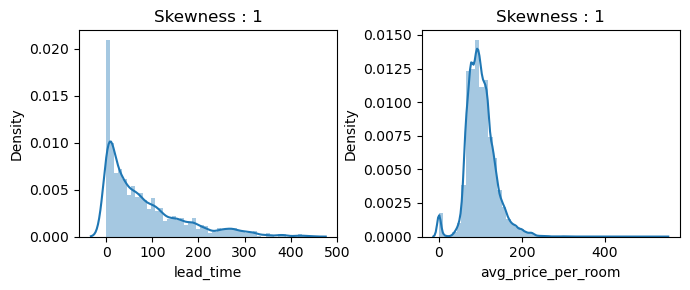

In [17]:
t = 1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.distplot(past_data[i])
    plt.title(f'Skewness : {round(past_data[i].skew())}')
    t+=1
    
plt.tight_layout()
plt.show()

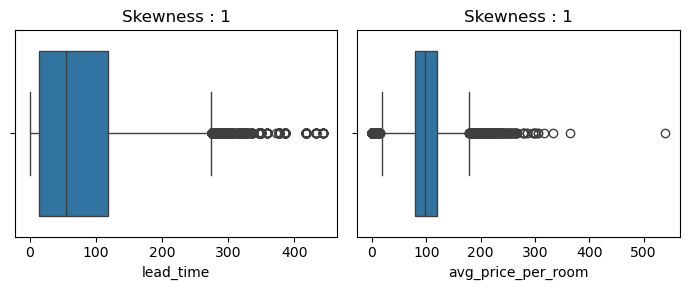

In [18]:
t = 1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data=past_data, x =i, orient='h')
    plt.title(f'Skewness : {round(past_data[i].skew())}')
    t+=1
    
plt.tight_layout()
plt.show()

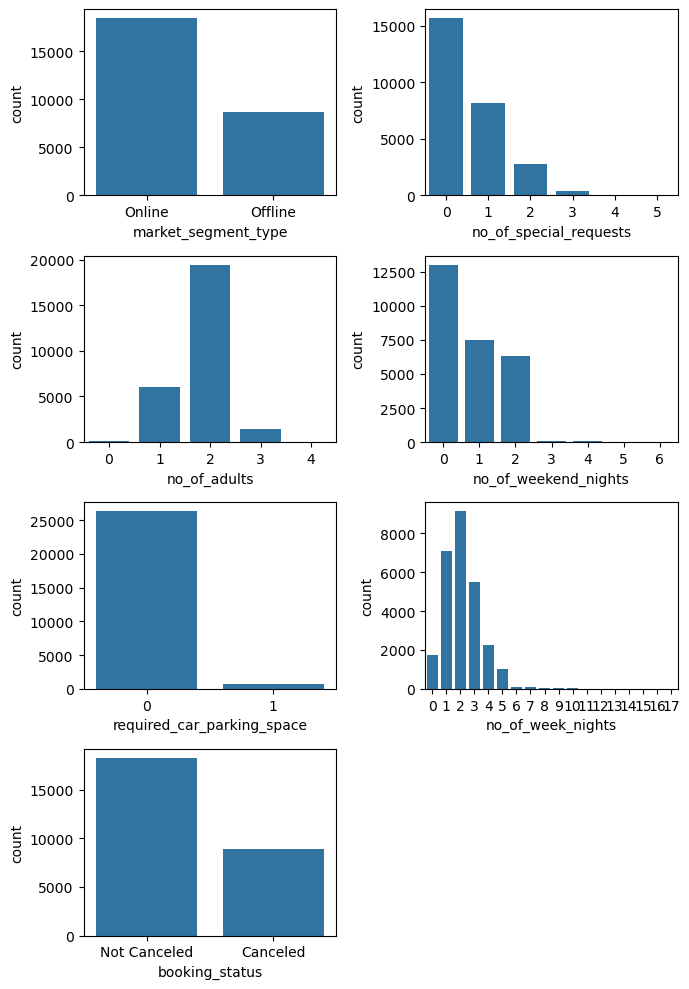

In [19]:
t = 1
plt.figure(figsize=(7,10))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data= past_data, x=i)
    t+=1
plt.tight_layout()
plt.show()

#### Bivariate Analysis

<Figure size 700x300 with 0 Axes>

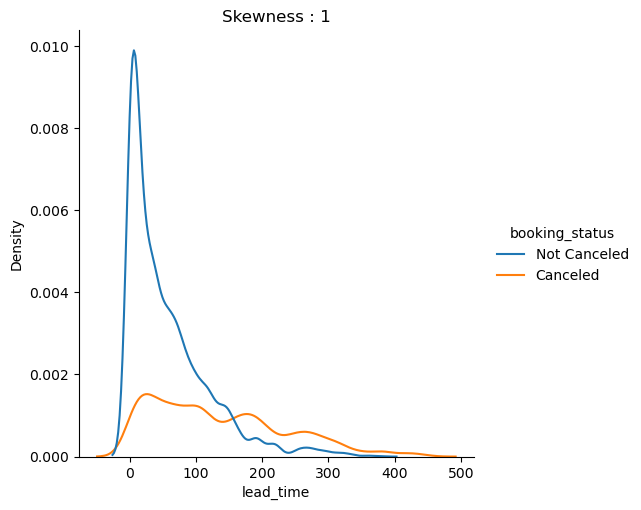

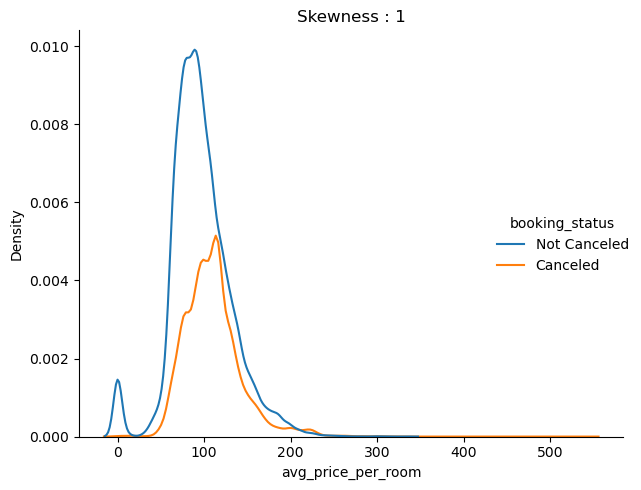

In [20]:
# Let's explore number vs category columns 


plt.figure(figsize=(7,3))
for i in num_cols:
    sns.displot(data=past_data,x=i,kind='kde', hue='booking_status')
    plt.title(f'Skewness : {round(past_data[i].skew())}')
    
plt.tight_layout()
plt.show()

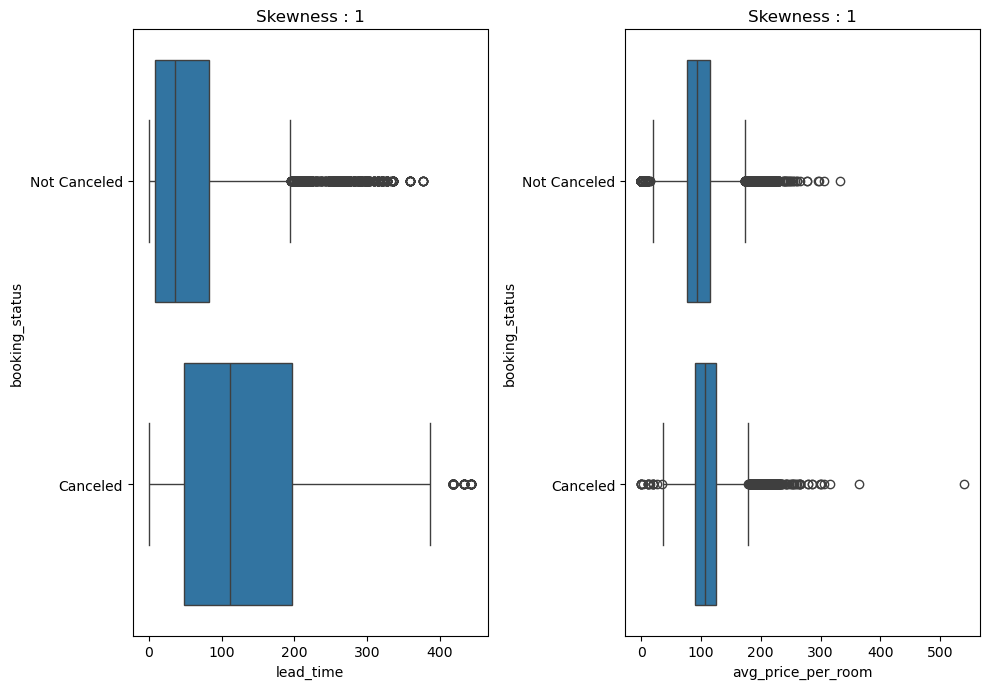

In [21]:
t = 1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data=past_data, x =i,y='booking_status', orient='h')
    plt.title(f'Skewness : {round(past_data[i].skew())}')
    t+=1
    
plt.tight_layout()
plt.show()

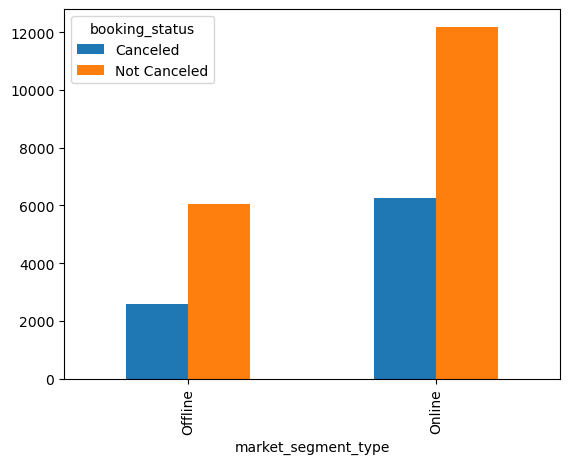

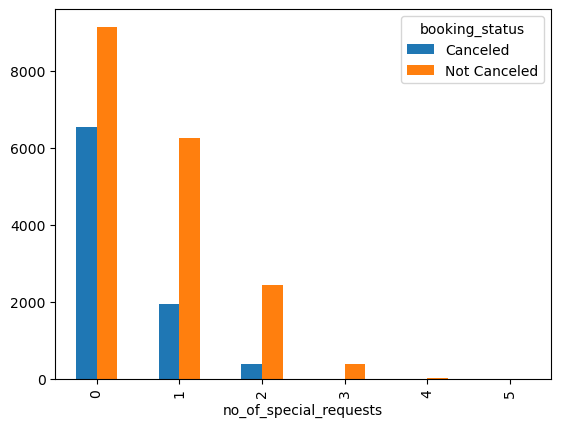

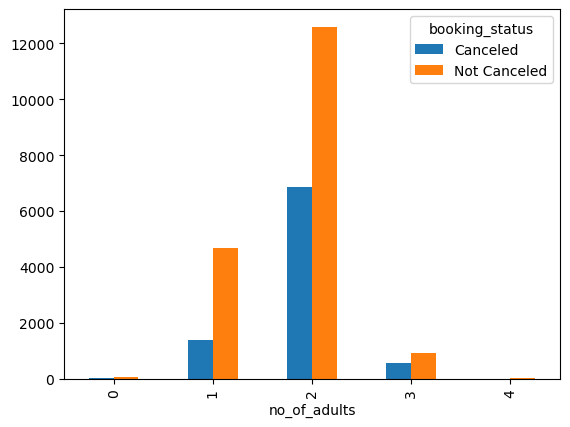

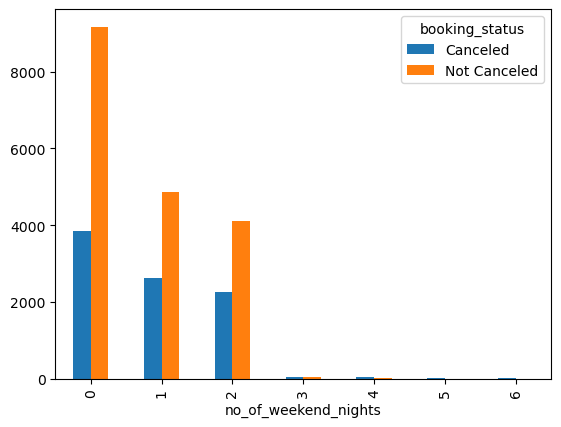

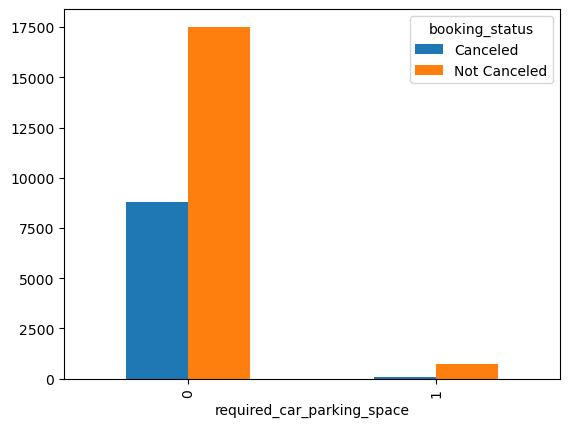

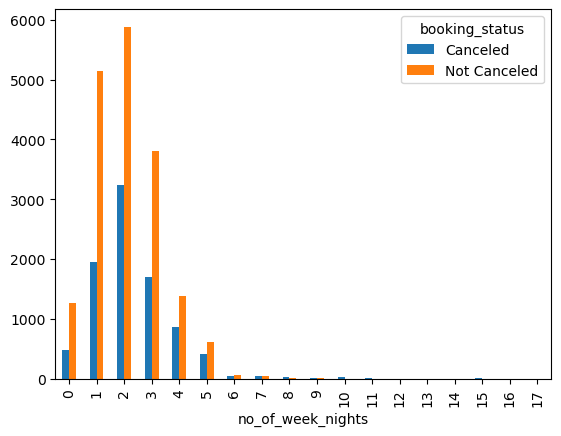

In [22]:
## Let's compare category vs category columns 

for i in cat_cols:
    if i != 'booking_status':
        pd.crosstab(index=past_data[i], columns=past_data['booking_status']).plot(kind='bar')
plt.show()

#### Inferential Testing/ Statisitics 

In [23]:
# To test booking with larger leadt time are more prone to get cancelled
# mu 1= Avg leat time of cancelled booking
# mu2 = Avg lead time of not cancelled booking

# H0: mu1>= mu2
# H1: mu1< mu2

sample1= past_data[past_data['booking_status']=='Canceled']['lead_time']
sample2= past_data[past_data['booking_status']=='Not Canceled']['lead_time']

# check for Assumptions
# Assumption 1: Normality Check
print(stats.shapiro(past_data['lead_time']))
#Asssumption 2: Equal Variances
print(stats.levene(sample1,sample2))

# Since the data fails both the assumptions, we need to use a non-parameteric test 
# Mahnwhitnyu
tstats, pval = stats.mannwhitneyu(sample1, sample2,alternative='less')

# with 95% confidence level, alpha = 5% or 0.05
if pval>0.05:
    print('Fail to reject H0')
else:
    print('Reject H0')

ShapiroResult(statistic=0.8447960019111633, pvalue=0.0)
LeveneResult(statistic=3210.120590252021, pvalue=0.0)
Fail to reject H0


# Data preprocessing

# Check for DEFECTS

In [24]:
## ANy null values
past_data.isnull().sum().sum()


0

In [25]:
## ANy null values
new_data.isnull().sum().sum()

0

In [26]:
## Check for duplicated rows
past_data[past_data.duplicated()]

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_101079,12,Offline,1,85.0,1,1,2021-01-01,0,0,Not Canceled
INNHG_101094,12,Offline,1,85.0,1,1,2021-01-01,0,0,Not Canceled
INNHG_101097,36,Online,0,110.0,1,2,2021-01-01,0,3,Not Canceled
INNHG_101098,231,Online,1,100.3,2,2,2021-01-01,0,2,Canceled
INNHG_101109,61,Online,1,149.4,2,2,2021-01-01,0,3,Not Canceled
...,...,...,...,...,...,...,...,...,...,...
INNHG_128113,113,Offline,0,85.0,2,1,2022-06-30,0,3,Canceled
INNHG_128115,113,Offline,0,85.0,2,1,2022-06-30,0,3,Canceled
INNHG_128118,113,Offline,0,85.0,2,1,2022-06-30,0,3,Canceled


In [27]:
# Drrop the duplicates
past_data.drop_duplicates(inplace=True)

In [28]:
past_data.shape

(18655, 10)

In [29]:
for i in num_cols:
    q3,q1 = np.percentile(past_data[i],[75,25])
    iqr = q3-q1
    UL,LL = q3+1.5+iqr, q1-1.5*iqr
    past_data[i] = past_data[i].apply(lambda x: UL if x>UL else LL if x<LL else x)

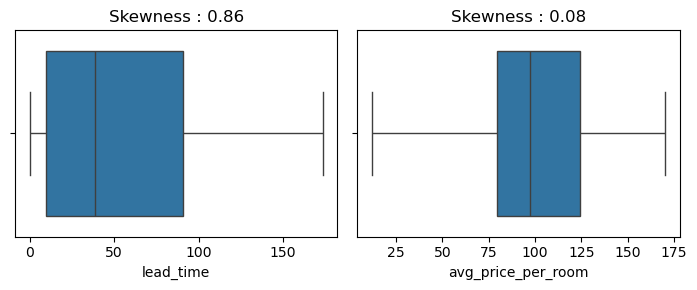

In [30]:
t = 1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data=past_data, x =i)
    plt.title(f'Skewness : {round(past_data[i].skew(),2)}')
    t+=1
    
plt.tight_layout()
plt.show()

# Feature Engineering

In [31]:
past_data['arrival_date']

booking_id
INNHG_101034    2021-01-01
INNHG_101035    2021-01-01
INNHG_101036    2021-01-01
INNHG_101037    2021-01-01
INNHG_101038    2021-01-01
                   ...    
INNHG_128121    2022-06-30
INNHG_128123    2022-06-30
INNHG_128124    2022-06-30
INNHG_128125    2022-06-30
INNHG_128126    2022-06-30
Name: arrival_date, Length: 18655, dtype: object

In [32]:
past_data['arrival_date']=pd.to_datetime(past_data['arrival_date'])

In [33]:
new_data['arrival_date']=pd.to_datetime(new_data['arrival_date'])

In [34]:
new_data.dtypes

lead_time                              int64
market_segment_type                   object
no_of_special_requests                 int64
avg_price_per_room                   float64
no_of_adults                           int64
no_of_weekend_nights                   int64
arrival_date                  datetime64[ns]
required_car_parking_space             int64
no_of_week_nights                      int64
booking_status                        object
dtype: object

In [35]:
past_data.dtypes

lead_time                            float64
market_segment_type                   object
no_of_special_requests                 int64
avg_price_per_room                   float64
no_of_adults                           int64
no_of_weekend_nights                   int64
arrival_date                  datetime64[ns]
required_car_parking_space             int64
no_of_week_nights                      int64
booking_status                        object
dtype: object

# Encoding

In [36]:
past_data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_101034,0.0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled
INNHG_101035,34.0,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled
INNHG_101036,24.0,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled
INNHG_101037,23.0,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled
INNHG_101038,46.0,Online,1,149.40,2,2,2021-01-01,0,3,Canceled


In [37]:
## Feature engg on new data:--->
new_data['arrival_day'] = new_data['arrival_date'].dt.day
new_data['arrival_month'] = new_data['arrival_date'].dt.month
new_data['arrival_weekday'] = new_data['arrival_date'].dt.weekday

In [38]:
## Feature engg on past data:--->
past_data['arrival_day'] = past_data['arrival_date'].dt.day
past_data['arrival_month'] = past_data['arrival_date'].dt.month
past_data['arrival_weekday'] = past_data['arrival_date'].dt.weekday

In [39]:
## Let's drop the 'arrival_date' from both the dataset

past_data.drop(columns=['arrival_date'], inplace=True)
new_data.drop(columns=['arrival_date'], inplace=True)

In [40]:
past_data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
booking_id,,,,,,,,,,,,
INNHG_101034,0.0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
INNHG_101035,34.0,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4


In [41]:
new_data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
booking_id,,,,,,,,,,,,
INNHG_128127,4,Online,1,103.0,1,0,1,1,Not Canceled,1,7,4
INNHG_128128,147,Online,2,103.7,2,2,0,2,Not Canceled,1,7,4


In [42]:
past_data['market_segment_type'] = past_data['market_segment_type'].map({'Online': 1, 'Offline':0})
new_data['market_segment_type'] = new_data['market_segment_type'].map({'Online': 1, 'Offline':0})

In [43]:
past_data['booking_status'] = past_data['booking_status'].map({'Canceled':1, 'Not Canceled':0})
new_data['booking_status'] = new_data['booking_status'].map({'Canceled':1, 'Not Canceled':0})

In [44]:
past_data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
booking_id,,,,,,,,,,,,
INNHG_101034,0.0,1,0,85.03,1,1,0,0,0,1,1,4
INNHG_101035,34.0,1,2,125.10,2,2,0,0,0,1,1,4


In [45]:
new_data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
booking_id,,,,,,,,,,,,
INNHG_128127,4,1,1,103.0,1,0,1,1,0,1,7,4
INNHG_128128,147,1,2,103.7,2,2,0,2,0,1,7,4


## Train test Split

In [46]:
x_train = past_data.drop(columns=['booking_status'])
y_train = past_data['booking_status']
x_test = new_data.drop(columns=['booking_status'])
y_test = new_data['booking_status']

In [47]:
print(f'y_train: {y_train.shape}, x_train: {x_train.shape}, y_test: {y_test.shape}, x_test: {x_test.shape}')

y_train: (18655,), x_train: (18655, 11), y_test: (3583,), x_test: (3583, 11)


In [48]:
x_test.head(3)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday
booking_id,,,,,,,,,,,
INNHG_128127,4,1,1,103.0,1,0,1,1,1,7,4
INNHG_128128,147,1,2,103.7,2,2,0,2,1,7,4
INNHG_128129,43,1,1,126.9,2,1,1,2,1,7,4


In [49]:
y_train.head(3)

booking_id
INNHG_101034    0
INNHG_101035    0
INNHG_101036    0
Name: booking_status, dtype: int64

## Predictive Modelling

In [50]:
mod = []
accur = []
rec = []
pre = []
f1 = []
ckap = []



def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]

    print('Confusion Matrix:\n', confusion_matrix(ytest,pred_h))
    print('\nClassification Report\n', classification_report(ytest,pred_h))

    fpr,tpr,thres = roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f'ROC_AUC:{round(roc_auc_score(ytest,pred_s),2)}')
    plt.show()

    ans = input('Do you want to save file? : Y/N')
    if ans.lower()=='y':
        mod.append(str(model))
        accur.append(accuracy_score(ytest,pred_h))
        pre.append(precision_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        ckap.append(cohen_kappa_score(ytest,pred_h))
        global scorecard
        scorecard = pd.DataFrame({'Model': mod, 'Accuracy':accur,'Recall': rec,
                                  'Precision':pre, 'F1_Score': f1,'Cohen Kappa':ckap})
    else:
        return
            

In [51]:
def tuning_params(grid,estimator,x,y,score='f1'):
    gscv = GridSearchCV(estimator=estimator, param_grid=grid, verbose=1, scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

## Class Weights

In [52]:
y_train.value_counts(normalize=True)

booking_status
0    0.711337
1    0.288663
Name: proportion, dtype: float64

In [53]:
weights = y_train.shape[0]/(2*y_train.value_counts()[0]), y_train.shape[0]/(2*y_train.value_counts()[1])

In [54]:
weights_dict = {k:v for k,v in zip(range(2),weights)}
weights_dict

{0: 0.7029012810851545, 1: 1.7321262766945218}

### Logistic Regression

Confusion Matrix:
 [[2121  262]
 [ 522  678]]

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.89      0.84      2383
           1       0.72      0.56      0.63      1200

    accuracy                           0.78      3583
   macro avg       0.76      0.73      0.74      3583
weighted avg       0.78      0.78      0.77      3583



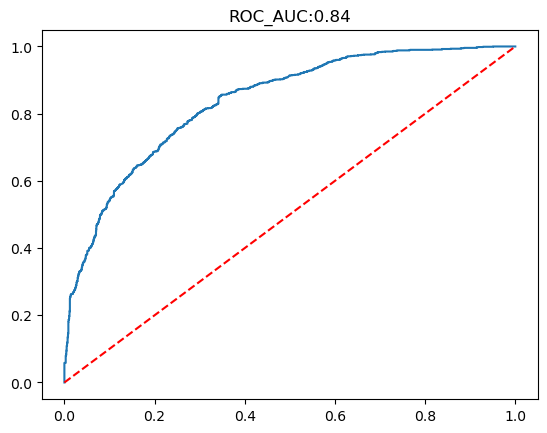

Do you want to save file? : Y/N y


In [55]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [56]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565,0.721277,0.633645,0.480918


## Naive Bays

Confusion Matrix:
 [[1405  978]
 [ 322  878]]

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      2383
           1       0.47      0.73      0.57      1200

    accuracy                           0.64      3583
   macro avg       0.64      0.66      0.63      3583
weighted avg       0.70      0.64      0.65      3583



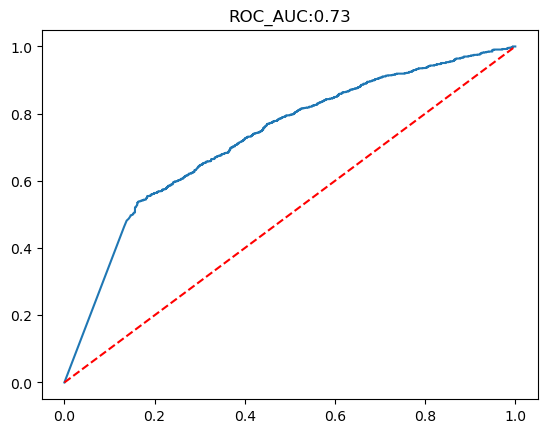

Do you want to save file? : Y/N y


In [57]:
model_validation(MultinomialNB(),x_train,y_train,x_test,y_test)

Confusion Matrix:
 [[1822  561]
 [ 419  781]]

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.76      0.79      2383
           1       0.58      0.65      0.61      1200

    accuracy                           0.73      3583
   macro avg       0.70      0.71      0.70      3583
weighted avg       0.74      0.73      0.73      3583



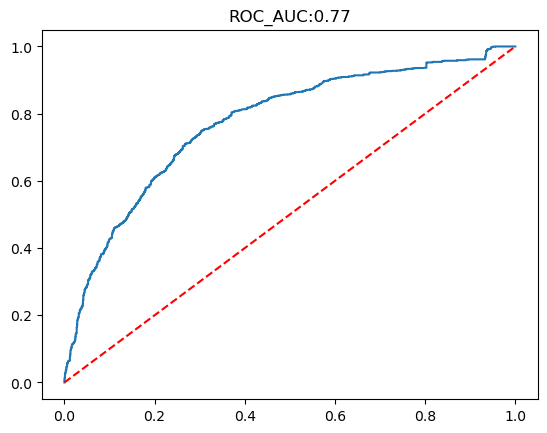

Do you want to save file? : Y/N y


In [58]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

In [59]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562


## Decision Tree 

In [60]:
dt_best = tuning_params(grid={'max_depth':[3,4,5,6,7,8,9,10]},estimator=DecisionTreeClassifier(class_weight=weights_dict),x=x_train, y=y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Confusion Matrix:
 [[1939  444]
 [ 248  952]]

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      2383
           1       0.68      0.79      0.73      1200

    accuracy                           0.81      3583
   macro avg       0.78      0.80      0.79      3583
weighted avg       0.82      0.81      0.81      3583



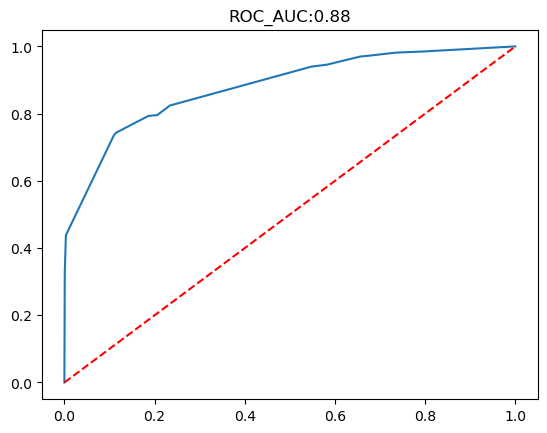

Do you want to save file? : Y/N y


In [61]:
model_validation(DecisionTreeClassifier(**dt_best,class_weight=weights_dict), x_train,y_train,x_test,y_test)

In [63]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562
3,DecisionTreeClassifier(class_weight={0: 0.7029...,0.806866,0.793333,0.681948,0.733436,0.583363


## Random Forest

In [64]:
best_rf = tuning_params(grid={'max_depth': [3,4,5,6,7,8,9,10],'n_estimators':[50,70,80,100,120,150]}
             , estimator=RandomForestClassifier(max_features=None),x=x_train, y=y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Confusion Matrix:
 [[1950  433]
 [ 307  893]]

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      2383
           1       0.67      0.74      0.71      1200

    accuracy                           0.79      3583
   macro avg       0.77      0.78      0.77      3583
weighted avg       0.80      0.79      0.80      3583



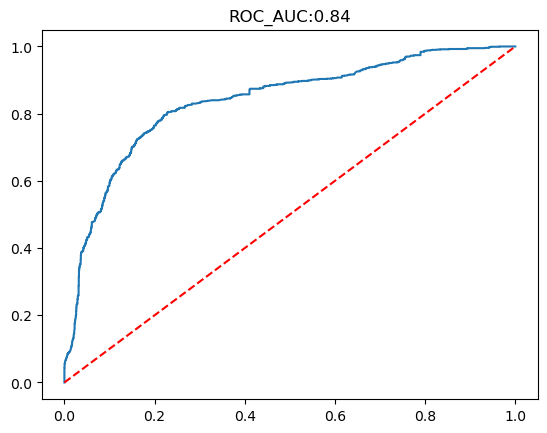

Do you want to save file? : Y/N y


In [65]:
model_validation(RandomForestClassifier(**best_rf, class_weight=weights_dict), x_train,y_train,x_test,y_test)

In [66]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562
3,DecisionTreeClassifier(class_weight={0: 0.7029...,0.806866,0.793333,0.681948,0.733436,0.583363
4,RandomForestClassifier(class_weight={0: 0.7029...,0.793469,0.744167,0.673454,0.707047,0.548176


### AdaBoost 

In [67]:
best_ada = tuning_params(grid={'n_estimators':[50,70,100,120,150],'learning_rate':[0.1,0.5]},
                        estimator=AdaBoostClassifier(estimator= DecisionTreeClassifier(class_weight=weights_dict)),
                        x = x_train, y= y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [68]:
best_ada

{'learning_rate': 0.5, 'n_estimators': 50}

Confusion Matrix:
 [[2025  358]
 [ 347  853]]

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2383
           1       0.70      0.71      0.71      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.78      0.78      3583
weighted avg       0.80      0.80      0.80      3583



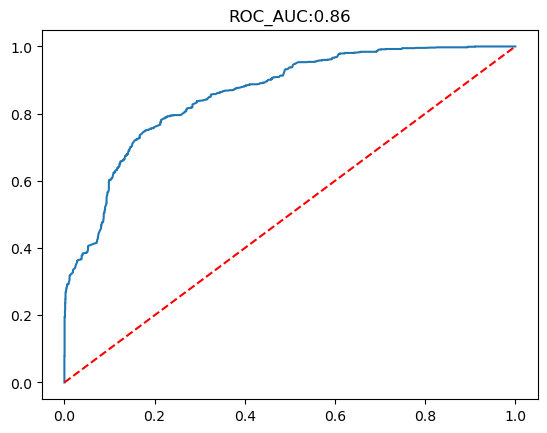

Do you want to save file? : Y/N y


In [69]:
model_validation(AdaBoostClassifier(**best_ada), x_train,y_train,x_test,y_test)

In [70]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562
3,DecisionTreeClassifier(class_weight={0: 0.7029...,0.806866,0.793333,0.681948,0.733436,0.583363
4,RandomForestClassifier(class_weight={0: 0.7029...,0.793469,0.744167,0.673454,0.707047,0.548176
5,AdaBoostClassifier(learning_rate=0.5),0.803238,0.710833,0.704377,0.707590,0.559330


## Gradient Boosting 

In [71]:
best_gd = tuning_params(grid={'n_estimators':[70,100,120],'learning_rate':[0.1,0.5], 'max_depth': [3,4,5,6]},
                        estimator=GradientBoostingClassifier(),
                        x = x_train, y= y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [72]:
best_gd

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 70}

Confusion Matrix:
 [[2100  283]
 [ 317  883]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      2383
           1       0.76      0.74      0.75      1200

    accuracy                           0.83      3583
   macro avg       0.81      0.81      0.81      3583
weighted avg       0.83      0.83      0.83      3583



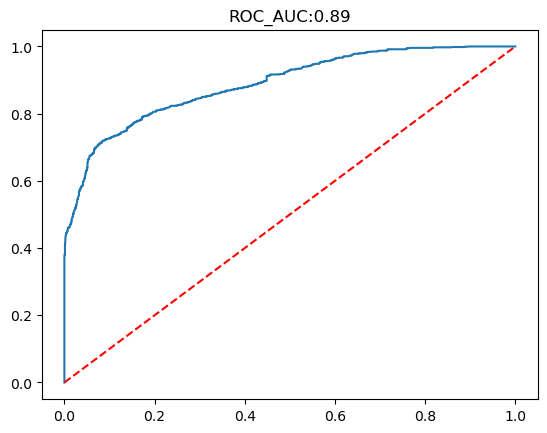

Do you want to save file? : Y/N y


In [73]:
model_validation(GradientBoostingClassifier(**best_gd), x_train,y_train,x_test,y_test)

In [74]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562
3,DecisionTreeClassifier(class_weight={0: 0.7029...,0.806866,0.793333,0.681948,0.733436,0.583363
4,RandomForestClassifier(class_weight={0: 0.7029...,0.793469,0.744167,0.673454,0.707047,0.548176
5,AdaBoostClassifier(learning_rate=0.5),0.803238,0.710833,0.704377,0.707590,0.559330
6,GradientBoostingClassifier(n_estimators=70),0.832543,0.735833,0.757290,0.746407,0.621446


## XGBoost

In [75]:
best_xgb = tuning_params(grid={'n_estimators':[70,100,120],'learning_rate':[0.1,0.5], 'gamma': [1,2,3]},
                        estimator=XGBClassifier(), x=x_train,y=y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [76]:
best_xgb

{'gamma': 3, 'learning_rate': 0.1, 'n_estimators': 100}

Confusion Matrix:
 [[2002  381]
 [ 298  902]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      2383
           1       0.70      0.75      0.73      1200

    accuracy                           0.81      3583
   macro avg       0.79      0.80      0.79      3583
weighted avg       0.81      0.81      0.81      3583



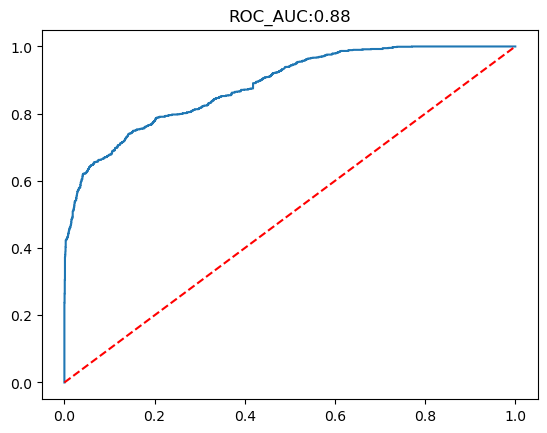

Do you want to save file? : Y/N y


In [77]:
model_validation(XGBClassifier(**best_xgb), x_train,y_train,x_test,y_test)

In [78]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562
3,DecisionTreeClassifier(class_weight={0: 0.7029...,0.806866,0.793333,0.681948,0.733436,0.583363
4,RandomForestClassifier(class_weight={0: 0.7029...,0.793469,0.744167,0.673454,0.707047,0.548176
5,AdaBoostClassifier(learning_rate=0.5),0.803238,0.710833,0.704377,0.707590,0.559330
6,GradientBoostingClassifier(n_estimators=70),0.832543,0.735833,0.757290,0.746407,0.621446
7,"XGBClassifier(base_score=None, booster=None, c...",0.810494,0.751667,0.703040,0.726540,0.581796


# Voting

In [82]:
base_estimators =[('DT', DecisionTreeClassifier(**dt_best,class_weight=weights_dict)),
                 ('RF', RandomForestClassifier(**best_rf,class_weight=weights_dict)),
                 ('GBM', GradientBoostingClassifier(**best_gd)),
                 ('XGB',XGBClassifier(**best_xgb))]


Confusion Matrix:
 [[2053  330]
 [ 291  909]]

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2383
           1       0.73      0.76      0.75      1200

    accuracy                           0.83      3583
   macro avg       0.80      0.81      0.81      3583
weighted avg       0.83      0.83      0.83      3583



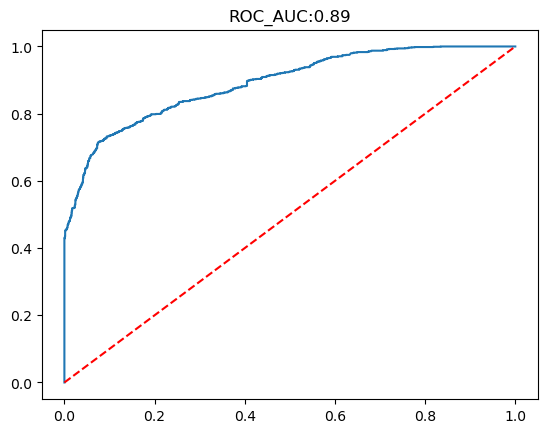

Do you want to save file? : Y/N y


In [83]:
model_validation(VotingClassifier(estimators=base_estimators,voting='soft',weights=(0.8,0.8,1.1,1.2)),x_train,y_train,x_test,y_test)

In [84]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562
3,DecisionTreeClassifier(class_weight={0: 0.7029...,0.806866,0.793333,0.681948,0.733436,0.583363
4,RandomForestClassifier(class_weight={0: 0.7029...,0.793469,0.744167,0.673454,0.707047,0.548176
5,AdaBoostClassifier(learning_rate=0.5),0.803238,0.710833,0.704377,0.707590,0.559330
6,GradientBoostingClassifier(n_estimators=70),0.832543,0.735833,0.757290,0.746407,0.621446
7,"XGBClassifier(base_score=None, booster=None, c...",0.810494,0.751667,0.703040,0.726540,0.581796
8,"VotingClassifier(estimators=[('DT',\n ...",0.826682,0.757500,0.733656,0.745387,0.614065


# Stacking

Confusion Matrix:
 [[1917  466]
 [ 245  955]]

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      2383
           1       0.67      0.80      0.73      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.80      0.79      3583
weighted avg       0.81      0.80      0.81      3583



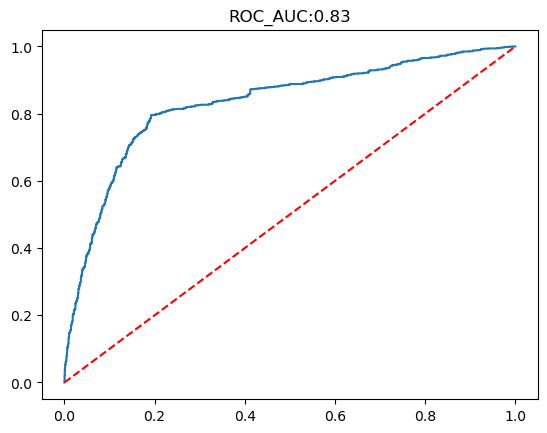

Do you want to save file? : Y/N y


In [87]:
model_validation(StackingClassifier(estimators=base_estimators,final_estimator=LogisticRegression(class_weight=weights_dict))
                 ,x_train,y_train,x_test,y_test)

In [88]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562
3,DecisionTreeClassifier(class_weight={0: 0.7029...,0.806866,0.793333,0.681948,0.733436,0.583363
4,RandomForestClassifier(class_weight={0: 0.7029...,0.793469,0.744167,0.673454,0.707047,0.548176
5,AdaBoostClassifier(learning_rate=0.5),0.803238,0.710833,0.704377,0.707590,0.559330
6,GradientBoostingClassifier(n_estimators=70),0.832543,0.735833,0.757290,0.746407,0.621446
7,"XGBClassifier(base_score=None, booster=None, c...",0.810494,0.751667,0.703040,0.726540,0.581796
8,"VotingClassifier(estimators=[('DT',\n ...",0.826682,0.757500,0.733656,0.745387,0.614065
9,"StackingClassifier(estimators=[('DT',\n ...",0.801563,0.795833,0.672062,0.728729,0.574040


# Final Model

In [89]:
best_xgb

{'gamma': 3, 'learning_rate': 0.1, 'n_estimators': 100}

In [91]:
grid={'n_estimator':[70,100,120],'learning_rate':[0.1,0.5],'max_depth':[3,5,7]}

In [94]:
final_xgb=tuning_params(grid=grid,estimator=XGBClassifier(),x=x_train,y=y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [95]:
final_xgb

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimator': 70}

Confusion Matrix:
 [[2020  363]
 [ 289  911]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      2383
           1       0.72      0.76      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.79      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



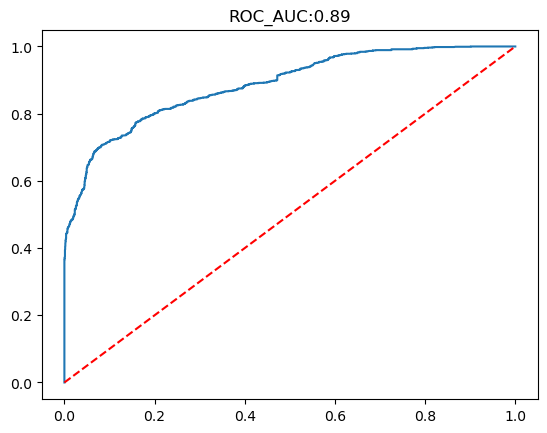

Do you want to save file? : Y/N n


In [96]:
model_validation(XGBClassifier(**final_xgb),x_train,y_train,x_test,y_test) # NO

In [97]:
final_model=XGBClassifier(**final_xgb)

In [98]:
final_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=70, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [99]:
final_model.score(x_test,y_test)

0.8180295841473626

Confusion Matrix:
 [[2020  363]
 [ 289  911]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      2383
           1       0.72      0.76      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.79      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



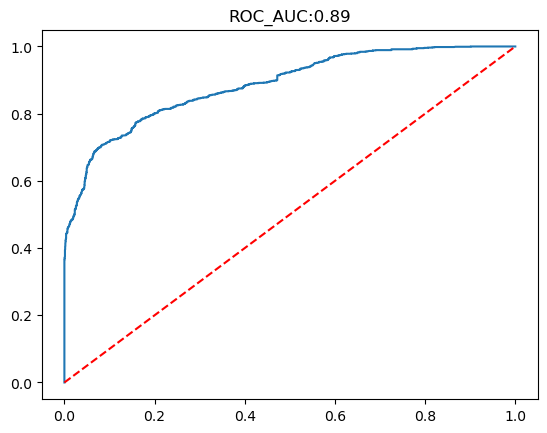

Do you want to save file? : Y/N y


In [100]:
model_validation(final_model,x_train,y_train,x_test,y_test) # yes

In [101]:
scorecard

,Model,Accuracy,Recall,Precision,F1_Score,Cohen Kappa
0,LogisticRegression(),0.781189,0.565000,0.721277,0.633645,0.480918
1,MultinomialNB(),0.637176,0.731667,0.473060,0.574607,0.282876
2,GaussianNB(),0.726486,0.650833,0.581967,0.614477,0.403562
3,DecisionTreeClassifier(class_weight={0: 0.7029...,0.806866,0.793333,0.681948,0.733436,0.583363
4,RandomForestClassifier(class_weight={0: 0.7029...,0.793469,0.744167,0.673454,0.707047,0.548176
5,AdaBoostClassifier(learning_rate=0.5),0.803238,0.710833,0.704377,0.707590,0.559330
6,GradientBoostingClassifier(n_estimators=70),0.832543,0.735833,0.757290,0.746407,0.621446
7,"XGBClassifier(base_score=None, booster=None, c...",0.810494,0.751667,0.703040,0.726540,0.581796
8,"VotingClassifier(estimators=[('DT',\n ...",0.826682,0.757500,0.733656,0.745387,0.614065
9,"StackingClassifier(estimators=[('DT',\n ...",0.801563,0.795833,0.672062,0.728729,0.574040


# Business Interpretation

In [104]:
fi=final_model.feature_importances_

In [105]:
fi_data=pd.DataFrame({'Feature Importance':fi},index=x_train.columns).sort_values(by='Feature Importance',ascending=False)

In [106]:
fi_data

,Feature Importance
market_segment_type,0.260761
lead_time,0.202886
no_of_special_requests,0.176164
avg_price_per_room,0.099834
required_car_parking_space,0.084722
arrival_month,0.067370
no_of_week_nights,0.033511
no_of_adults,0.025056
no_of_weekend_nights,0.024097
arrival_weekday,0.016535


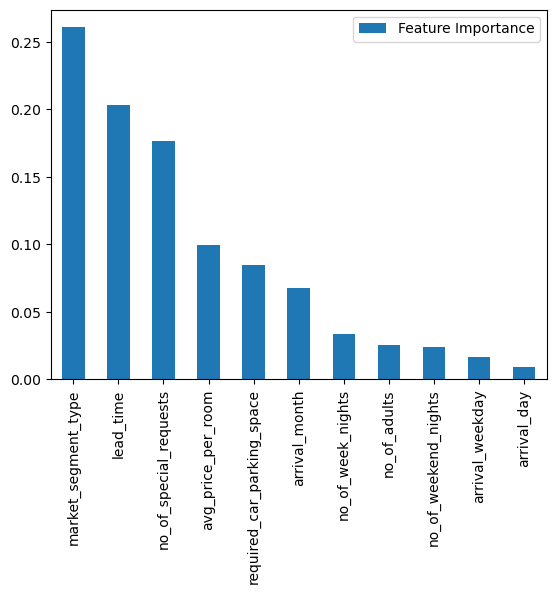

In [107]:
fi_data.plot(kind='bar')
plt.show()

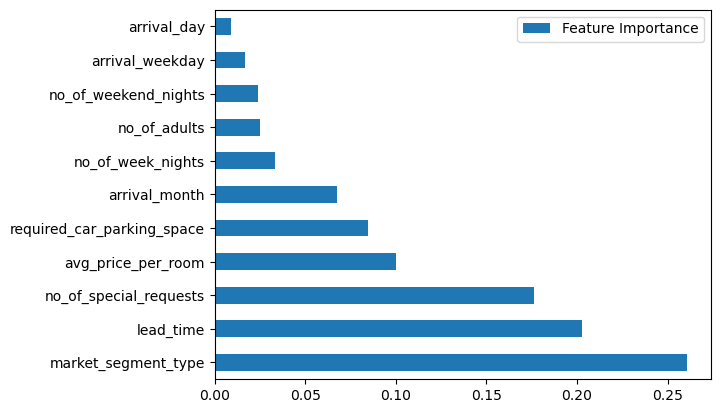

In [108]:
fi_data.plot(kind='barh')
plt.show()

# Deployment

In [103]:
# Save the final model as pickle file

with open('final_model_xgb.pkl','wb') as file:
    pickle.dump(final_model,file)